In [2]:
# Importing the required models and library for the code
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Importing/Reading the data file for which the model is to be built
df = pd.read_excel('/Users/ambu/Desktop/DataScience/GL/Ensemble Techniques-GL/Ensemble day 2 - 29 Jan contents/Folds5x2_pp.xlsx')

In [4]:
# Viewing the data set that is loaded
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
# Getting info on the datatype of the columns in the data and the count of data available
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


### Pair Plot

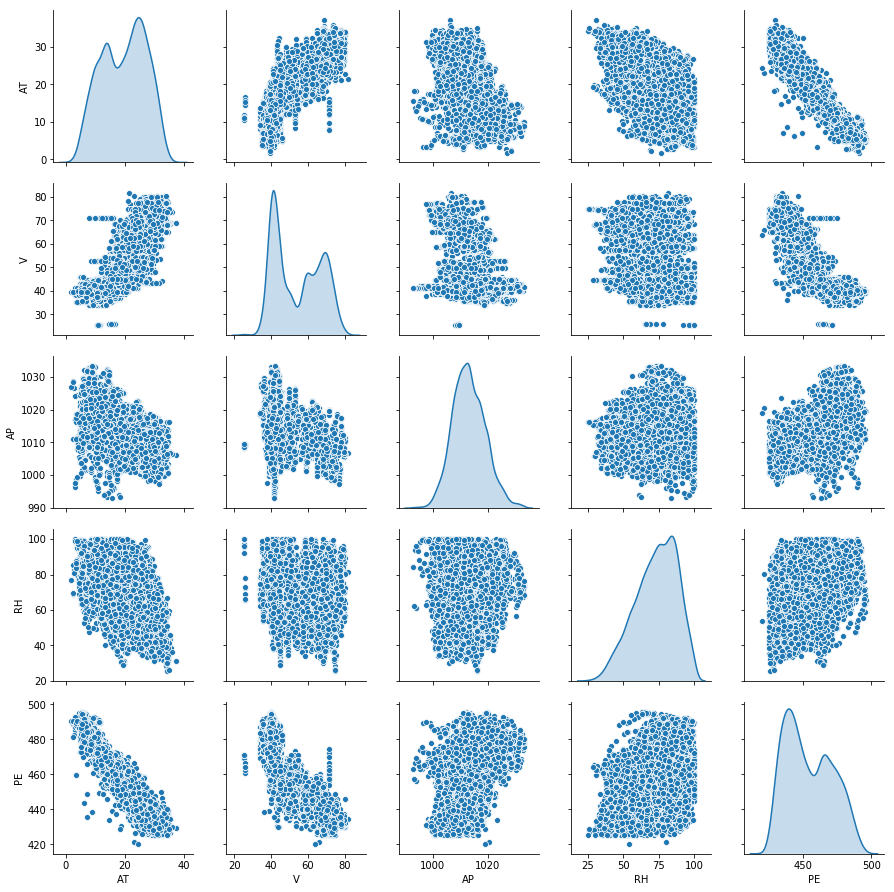

In [6]:
# Plotting the pair plot to understand the effects of the different Independent variables on our Dependent variable
sns.pairplot(df, diag_kind = 'kde')
plt.show()

In [7]:
# Creating a new variable to seperate the IV's and DV
x = df.drop('PE', axis = 1)
y = df['PE'].values

In [8]:
# Creating a Train-Test split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [9]:
# Creating another Train-Test split from the above split data in order to achieve a validation data
# Validation data to understand the functioning of the models that are going to be created and
# Check how they might work on the population/production
x_train_val,x_test_val,y_train_val,y_test_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 1)

## Using Different Supervised Learning Models and Ensemble Models:
#### 1.To increase the Prediction accuracy
#### 2.To understand the differene in the prediction rate of the different models created

### Linear Regression Model

In [10]:
LR = LinearRegression()  # Creating a Linear Regression model

In [11]:
LR.fit(x_train_val,y_train_val)  # Fitting the model in the second train-test split data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
LR.score(x_test_val,y_test_val)  # Finding the accuracy score for the fit model

0.926565781935037

In [13]:
LR.score(x_test,y_test)

0.9294777120876526

In [14]:
y_cap_val = LR.predict(x_test_val)
rmse_val = np.sqrt(np.mean((y_cap_val - y_test_val)**2))  # Obtaining the RMSE value for the model that is being created
rmse_val  # Printing the result of the RMSE value

4.614834058706894

In [15]:
y_cap = LR.predict(x_test)
rmse = np.sqrt(np.mean((y_test - y_cap)**2))
rmse

4.558581200300409

### DT MODEL

In [16]:
DT = DecisionTreeRegressor()  # Creating a DecisionTree Regressor model

In [17]:
DT.fit(x_train_val,y_train_val)  # Fitting the created model in our training data

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [18]:
DT.score(x_train_val,y_train_val)

1.0

In [19]:
DT.score(x_test_val,y_test_val)  # Obtaining the accuracy score for the created model on the test data

0.9195471433460644

In [20]:
DT1 = DecisionTreeRegressor()

In [21]:
DT1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [22]:
DT1.score(x_test,y_test)

0.9275796438573863

In [23]:
DT1.score(x_train,y_train)

1.0

### Bagging Ensemble

In [24]:
# Creating an Ensemble model Bagging
BGE = BaggingRegressor(base_estimator = DT, n_estimators = 100, oob_score = True, max_samples = 1.0)

In [25]:
BGE.fit(x_train,y_train)  # Fitting the Ensemble model on the train data

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [26]:
print(BGE.oob_score_) # Printing the Out Of Bag score for the fitted model on our data

0.9580469405056148


In [27]:
BGE.fit(x_train_val,y_train_val)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [28]:
print(BGE.oob_score_)

0.956036769695391


### GradientBoost Ensemble

In [29]:
# Creating another Ensemble model Gradient Boost 
# In order to get the desired accuracy score for our data
GBR = GradientBoostingRegressor(n_estimators = 100, random_state=1)

In [30]:
GBR = GBR.fit(x_train_val,y_train_val)   # Fitting the model on the val train data
GBR.score(x_test_val,y_test_val)         # Obtaining the accuracy score for the fitted model

0.9437244555201663

### RandomForest Ensemble

In [31]:
# Creating another Ensemble model RandomForest
RFR = RandomForestRegressor(n_estimators = 100, random_state = 1)

In [32]:
RFR = RFR.fit(x_train_val,y_train_val)   # Fitting the model on the train data set
RFR.score(x_test_val,y_test_val)   # Obtaining the accuracy score for the model created

0.9528492797840825

### Removing Variables and Redoing the Models

#### From the pairplot plotted above after understanding the inpacts of the variables on the Dependent variable
#### We remove variables that do not cause greater inpact on the Prediction of the data when used in the model
#### Hence removing the variables not causing greater inpact on the data and redoing the models done above

In [33]:
x1 = df.drop(['PE','AP','RH'], axis = 1)
y1 = df['PE']

In [34]:
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(x1,y1, test_size = 0.3, random_state = 1)
x_train_val_1,x_test_val_1,y_train_val_1,y_test_val_1 = train_test_split(x_train_1,y_train_1, test_size = 0.3, random_state = 1)

In [35]:
LR1 = LinearRegression()
LR1.fit(x_train_val_1,y_train_val_1)
LR1.score(x_test_val_1,y_test_val_1)

0.9130472422294159

In [36]:
GBR1 = GradientBoostingRegressor(n_estimators = 100, random_state=1)
GBR1 = GBR1.fit(x_train_val_1,y_train_val_1)
GBR1.score(x_test_val_1,y_test_val_1)

0.9350442160678304

In [37]:
GBR1.score(x_train_val_1,y_train_val_1)

0.9479091153492233

### XGBOOST

In [38]:
import xgboost as xgb    # Importing the library for Xtreme Gradient Boost

In [39]:
# Creating a DMatrix Train and Test data set
DM_train = xgb.DMatrix(data = x_train, 
            label = y_train)  
DM_test =  xgb.DMatrix(data = x_test,
            label = y_test)

In [40]:
# Importing the GridSearch library to perform grid search to obtain the best hyper parameters
from sklearn.model_selection import GridSearchCV
# Importing the Metrics library to obtain our performance metrics
from sklearn.metrics import mean_squared_error

In [41]:
# setting the hyper parameters ... Ref https://xgboost.readthedocs.io/en/latest/python/python_api.html

gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),  # generate 5 numbers between .5 and .9 
     'n_estimators':[10, 200],
     'max_depth': [10, 15, 20, 25]
}

In [42]:
gbm = xgb.XGBRegressor()  # Creating the XGboost model without the hyper parameters

In [43]:
# Doing the GridSearch to obtain the best hyperparameters that would imporve the created model
grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)

In [44]:
grid_mse.fit(x_train, y_train)   # Fitting the grid search model on the train data
print("Best parameters found: ",grid_mse.best_params_)  # Obtaining the best parameters of the model
# Obtaining the Root Mean Squared Error of the model
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_))) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.5min finished


Best parameters found:  {'colsample_bytree': 0.8, 'max_depth': 10, 'n_estimators': 200}
Lowest RMSE found:  3.2254500196141582


In [45]:
pred = grid_mse.predict(x_test)  # Predicting the outcome with the model created
# Obtaining the RMSE error for the predicted values
print("Root mean square error for test dataset: {}".format(np.round(np.sqrt(mean_squared_error(y_test, pred)), 2)))

Root mean square error for test dataset: 2.91


In [46]:
import statsmodels.api as sm

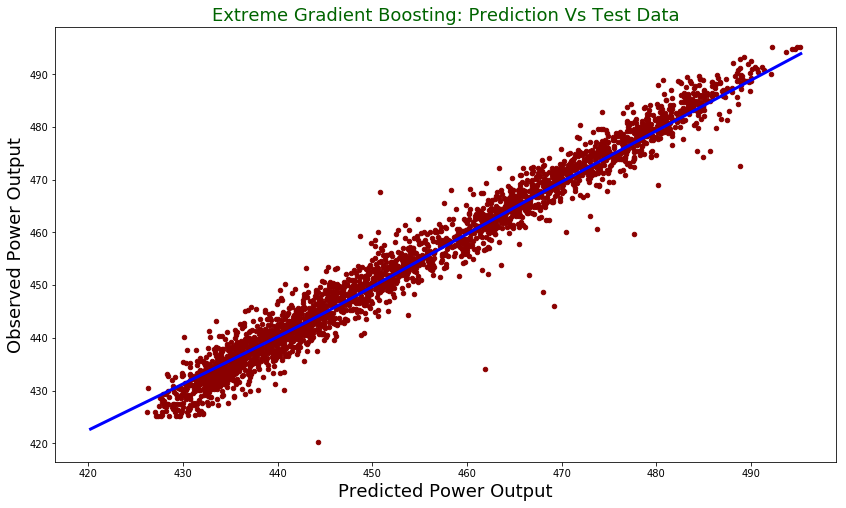

In [47]:
# Plotting a scatter plot between the predicted and the actual output of the data set
# Plotting is done to understand how close or far the scattering of the predicted data is
test = pd.DataFrame({"prediction": pred, "observed": y_test.flatten()})  
lowess = sm.nonparametric.lowess
z = lowess(pred.flatten(), y_test.flatten())
test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'darkred')
plt.title("Extreme Gradient Boosting: Prediction Vs Test Data", fontsize = 18, color = "darkgreen")
plt.xlabel("Predicted Power Output", fontsize = 18) 
plt.ylabel("Observed Power Output", fontsize = 18)
plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)
plt.show()

In [48]:
from sklearn.utils import resample  # Importing the library file for performing Bootstrap Sampling

In [49]:
n_iterations = 100    # Giving the number of times we would want our loop to  run
n_size = int(len(df)*0.5)   # Obtaining the size of the data set

In [50]:
values = df.values    # Obtaining the values of the data set in a different variable
stats = list()        # Creating an empty list
# Using the For loop to run our model on different samples of data for obtained number of iterations
for i in range(n_iterations): 
    # Obtaining the Train data using the Bootstrap Sampling from the data set
    train = resample(values, n_samples = n_size)   
    # Obtaining the Test data. That is the data that is not present in the Train data obtained above
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  
    model = xgb.XGBRegressor()   # Creating the Ensemble model Xtreme Gradient Boost
    model.fit(train[:,1:],train[:,0])    # Fitting the model on the Train data
    predictions = model.predict(test[:,1:])    # Predicting the Dependent variable on the test data using the model fitted 
    score = model.score(test[:,1:], test[:,0])  # Obtaining the accuracy score of the model
    stats.append(score)   #  Appending/Adding the obtained output of the accuracy score to the empty list created at first

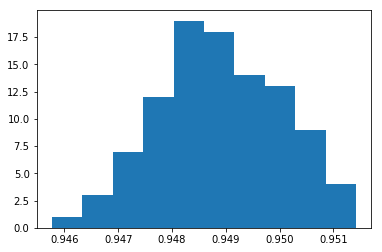

95.0 confidence interval 94.7% and 95.1%


In [51]:
# Plotting the graph of the obtained accuracy scores list using the plot function
plt.hist(stats)    # Histogram type of graph is plotted
plt.show()
alpha = 0.95       
# Calculating the confidence intervals
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
# Printing the output of the obtained confidence intervals
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [52]:
score

0.9505795958714657

In [53]:
# Adding hyperparameters to the model created above in order to achieve the desired scores
# Hyperparameters are obtained by running the GRIDSearch method in order to use those parameters
# To obtain the desired accuracy score and confidence interval
values = df.values
stats = list()
for i in range(n_iterations):
    train = resample(values, n_samples = n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model = xgb.XGBRegressor(colsample_bytree = 0.8, max_depth = 10, n_estimators = 200)
    model.fit(train[:,1:],train[:,0])
    predictions = model.predict(test[:,1:])
    score = model.score(test[:,1:], test[:,0])
    stats.append(score)

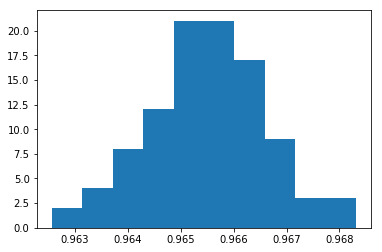

95.0 confidence interval 96.3% and 96.8%


In [54]:
# Plotting the histogram in order to obtain the Confidence Interval at 95%
plt.hist(stats)
plt.show()
alpha = 0.95                              
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))

# Printing the output of the obtained Confidence Interval for 95%
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [55]:
score

0.9663385257190809